In [1]:
# importing important modules
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
import pandas as pd
import numpy as np

/home/aman/anaconda3/envs/environment_name/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
# silence warnings
warnings.filterwarnings("ignore")

## Structure

In [3]:
# Creating an empty Structural Model
sm = StructureModel()

In [4]:
# model ready data
data = pd.read_csv('../data/modelData.csv')

In [5]:
data.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,driver_id,driver_action,lat,lng,completion_minutes,status,Distance
0,-1.951356,1.162884,-1.127166,-1.972742,-1.99664,0.431229,8.197324,-0.000862,-0.000862,-0.432759,15.554280,-1.052894
1,-1.951356,1.162884,-1.127166,-1.972742,-1.99664,0.420804,-0.121991,-0.000862,-0.000862,-0.432759,-0.064291,-0.246701
2,-1.951356,1.162884,-1.127166,-1.972742,-1.99664,0.431316,-0.121991,-0.000862,-0.000862,-0.432759,-0.064291,-0.966348
3,-1.951356,1.162884,-1.127166,-1.972742,-1.99664,0.418676,-0.121991,-0.000862,-0.000862,-0.432759,-0.064291,-1.054776
4,-1.951356,1.162884,-1.127166,-1.972742,-1.99664,-2.703749,-0.121991,-0.000862,-0.000862,-0.432759,-0.064291,-0.180851


In [6]:
sm.edges

OutEdgeView([])

## Visualize the learned SM

In [7]:
sample = data.head(100000)

In [8]:
#Apply notears to learn the structure
sm_data = from_pandas(sample.iloc[:, :], w_threshold=0.8, tabu_parent_nodes=['status'])

In [13]:
# Plotting the Structure Model
node_attributes = {
    "diagnosis": { 
        "shape": "star",
        "style": "filled",
        "width": 0.6,
        "penwidth": "1", 
        "color": "#4a90e2d9",
        "orientation": 25, 
    },
    "fontsize": 0.1
}

graph_attributes = {
    "scale": "1",
    "size": 5,
    "label": "",
    #Logistic opt. Causal model
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 15, # font size of the graph title
    "dpi": 200,  # resolution
    "labeljust": "l",  # left
    "labelloc": "t",  # top
}

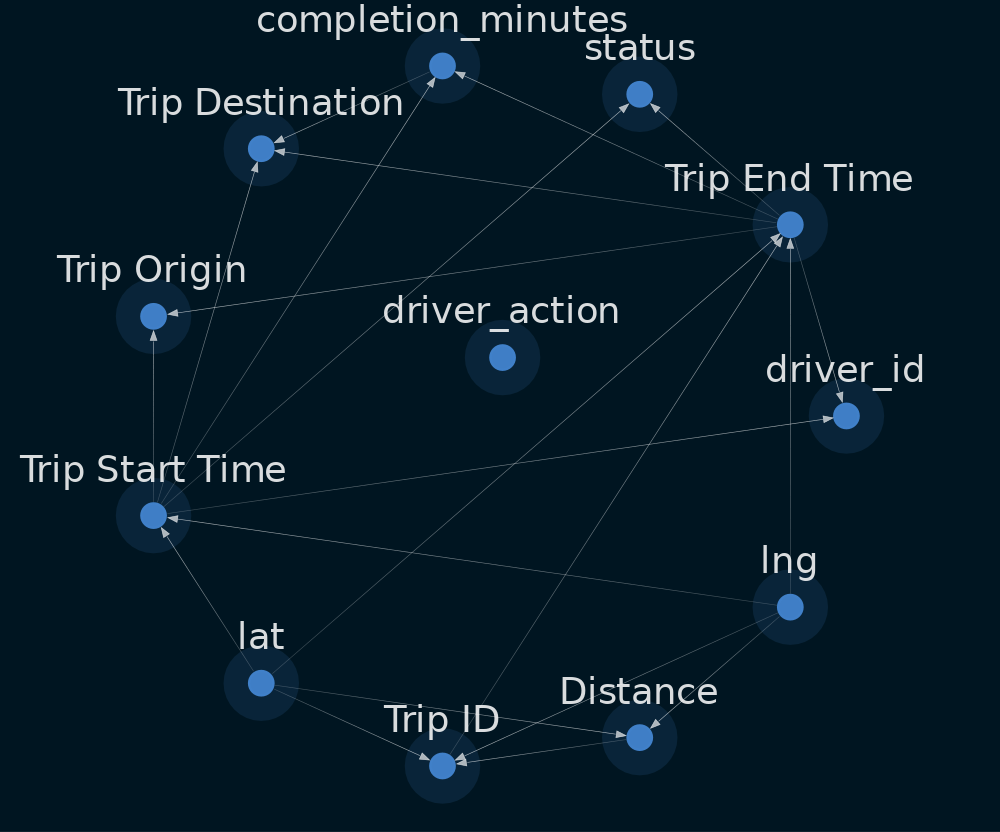

In [14]:
# Plotting the Structure Model
print("Logistic opt. Causal model")
viz = plot_structure(
    sm_data,
    prog="circo",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    all_edge_attributes=EDGE_STYLE.WEAK)
    
Image(viz.draw(format='png'))